# Day 11 Group Worksheet
Oct 16, 2023

If you're working on CoCalc, it's good to rename your notebook with a fun group name and to include your names below so that you can easily find it later for reference.

* Fun group name:   
* Group members:

## *1 Overview and additional `solve_ivp` details*

In today's group worksheet you will update your Electric Field Hockey code from Day 09 to use `solve_ivp` instead of your `euler_method` function, and then further revise your code as you tackle new Electric Field Hockey challenges.

Before we provide the new Electric Field Hockey challenges, let's look at some additional helpful details related to using `solve_ivp`

### 1.1 Passing our `args` object to `solve_ivp`

In our `euler_method` function, we passed it a list, `args=[fixed_charges, constants]`, as an argument with information about our fixed charges and our useful constants. When using `solve_ivp` we will pass `args` to it using very similar syntax. Note we include two different examples of notation for passing the time information to `solve_ivp` depending on if you want to adopt the notation used in Reading11 or in Worksheet09:
```python
sol = solve_ivp(diff_eqns, t_span, state0, t_eval=t_eval, args=[fixed_charges, constants], events)
```
or
```python
sol = solve_ivp(diff_eqns, [t0, tmax], state0, t_eval=times, args=[fixed_charges, constants])
```

### 1.2 Using the `args` parameter in our differential equations function

The `args` object that we pass to `solve_ivp` will subsequently by passed to our differential equations function (`diff_eqns` in all of our examples so far), so we need to include `args` as a third parameter. When we accept this parameter into our differential equations function we need to add `*` to the `args` parameter as shown and discussed below. When you use this notation, unpacking `args` into charges, k, q and m will still uses the same syntax that we saw in our `euler_method` function on Worksheet09. Here's how we include `*args` as a parameter in `diff_eqns`:
```python
def diff_eqns(t, state, *args):
    
    x, y, vx, vy = state
    charges = args[0]
    k, q, m = args[1]
    
    ### your code here to find ax and ay
    
    return [vx, vy, ax, ay]
```
This `*` is an operator that indicates that the `args` argument passed into this function should be accepted as a tuple with an arbitraty number of elements and is known in Python as "argument unpacking" or "tuple unpacking" when used in a function call. Do not worry for now about the slightly complicated reasons why this is needed. 

### 1.3 Using the `args` parameter in our events functions

In Reading11, we introduced events in `solve_ivp` as a way to flag and/or stop the simulation based on events that occur. Even if we don't actually make use of our `args` object in these event functions, we still need to include it as a parameter using the `*args` notation due to the fact that we passed `args` to `solve_ivp` in the first place. Here's how we include `*args` as a parameter in an event function:
```python
def event1(t, state, *args):
    return state[0] 

event1.terminal = True
event1.direction = 0
```

### 1.4 Using multiple events and extracting useful information about these events 

You may want to use multiple different conditions to trigger events and it is best practice to use a separate event function for each. For example, `event1` above will trigger when `state[0]` crosses 0, but we could also add a non-terminal event (i.e., one that won't stop the solver) that would trigger when `state[0]` crosses 1:
```python
def event2(t, state, *args):
    return state[0]-1. 

event2.terminal = False # This makes it so that this event won't stop the simulation
event2.direction = 0
```
To include multiple event functions in `solve_ivp` we would use the following syntax
```python
sol = solve_ivp(diff_eqns, t_span, state0, t_eval=t_eval, 
                args=[fixed_charges, constants], events=[event1, event2])
```
or
```python
sol = solve_ivp(diff_eqns, [t0, tmax], state0, t_eval=times, 
                args=[fixed_charges, constants], events=[event1, event2])
```
Information about these events is returned as part of the solution object returned by `solve_ivp`. If our solution was `sol`, then the time information will be stored in `sol.t_events` and the state information in `sol.y_events`. Don't forget that in `solve_ivp` solutions, `y` refers to the overall state and not just a position y. 

Continuing along with our example from above where we are using two event functions, `events=[event1, event2]`, we need to use indexing with `sol.t_events` and `sol.y_events` to access the information from a specific event function. For example: 
```python
t_event1 = sol.t_events[0]
state_event1 = sol.y_events[0]
```
and
```python
t_event2 = sol.t_events[2]
state_event2 = sol.y_events[2]
```
It is important to note in this example that `t_event1`, `state_event1`, `t_event2` and `state_event2` will all be arrays, because each event could have triggered multiple times, so you will have to further unpack the information in those arrays to extract the information you want.

## *2 Tasks*

### Task 1: Convert your Electric Field Hockey simulation to one that uses `solve_ivp`

Make use of the hints and additional details above to get your Worksheet09 Electric Field Hockey simulation working using `solve_ivp` instead of `euler_method`.

In [1]:
# Your code using solve_ivp here



In [2]:
# Add more code blocks as needed



### Task 2: Score a goal around a barrier

Revise your simulation with new initial conditions and setup parameters detailed below.

* Change the initial state vector so that the moving charge starts at rest on the left-hand side of the play area, `state0 = [0.2, 0.5, 0.0, 0.0]`
* Move the goal down so that it is centered vertically, `goal_dim = [.45, .55, 1.] # y1, y2, x`
* Introduce a barrier, at `x = .0.6` and which spans `(y1, y2) = (0.35, 0.65)`. 

Your goals when completing this task are detailed below. Only the first one should be taken as a "must do", but you will find the other two helpful to have done once you are sitting down to work on Homework02.

1. (Must do) Figure out an arrangement of blue and red charges that will get the moving charge into the goal without hitting the barrier
1. (Good to do) Add "no goal" or "hit the barrier" feedback if the charge hits or passes through the location of the barrier
1. (Good to do) When the moving charge hits the barrier, make it so the simulation only draws the path up to the point. Note that it can be quite tricky to use a terminal event (`event.terminal = True`) to have the solver stop when it hits the barrier so you may wish to consider flagging the event without stopping the solver (`event.terminal = False`) and then make use of `sol.t_events` and `sol.y_events` after the solver has completed to figure out how much of the path to draw. However, it is possible to use `event.terminal = True` or `event.terminal = False` effectively here so the choice is yours.

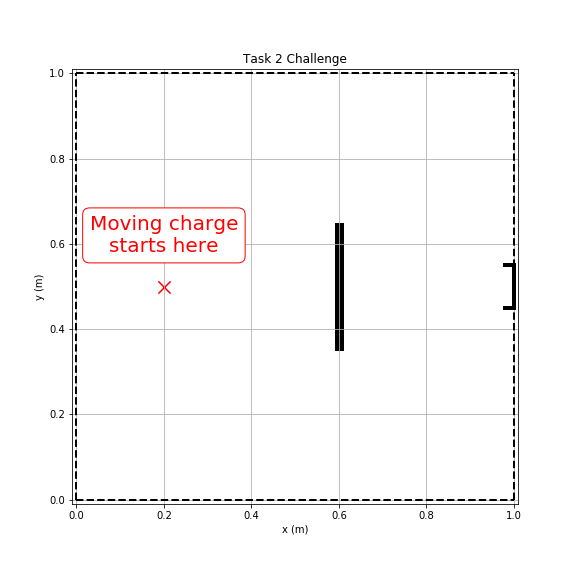
Image also viewable at https://i.ibb.co/92TMt10/one-barrier.png

In [5]:
# Your Task 2 code here



In [6]:
# Add more code blocks as needed



### Task 3: Turn the rest of your code into a function that accepts the `state0` and `fixed_charges` lists as arguments, and returns if a goal was scored or not

Another task that is going to be very helpful for your work on Homework 02 is to be able to efficiently try multiple different sets of `state0` variables and receive feedback regarding if a goal was scored or not.

Update/reconfigure your code so that you have a main function (e.g., `electric_field_hockey()`) that calls `solve_ivp`, does all of the plotting, and returns a value indicating if a goal was scored or not. You should be able to run the whole simulation by simply setting the `state0` and `fixed_charges` lists and then calling your main function similar to the example below:
```python
state0 = [0.2, 0.5, 0, 0]
fixed_charges = [[0.15, 0.3, 'r']]
goal_status = electric_field_hockey(state0, fixed_charges)
```

In [10]:
# Your Task 3 code here



In [11]:
# Add more code blocks as needed



### Task 4 (optional): Score a goal around a more complicated barrier

Use the same `state0` and `goal_dim` lists from Task 2, make a setup that has the followig two barriers instead:
* Introduce a barrier, at `x = .0.4` and which spans `(y1, y2) = (0.5, 0.8)`
* Introduce a barrier, at `x = .0.7` and which spans `(y1, y2) = (0.3, 0.6)`. 

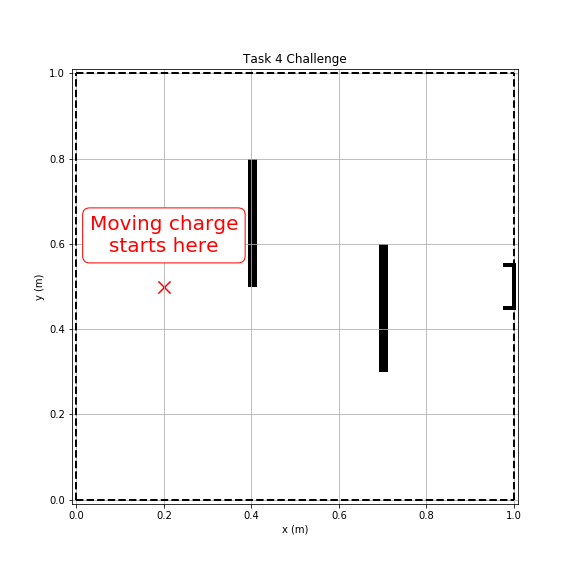

The image is also viewable at https://i.ibb.co/KrHqfvH/two-barriers.png

In [14]:
# Your Task 4 code here



In [15]:
# Add more code blocks as needed

